# Slideshow Instructions:
1. Put your browser in "Full Screen" mode, and make sure Zoom is not more than 100%.  Otherwise stuff won't fit. 
2. Run `Kernel > Restart & Run All` (so 3D plots get generated)
2. When that finishes, press `Alt-R` (or the little bar-graph icon in the middle of the toolbar) then `Home` to start the show! 

(Space bar to advance the slide, and ? for help. On a Mac, `Home` is `Command-LeftArrow`.)

# The Joy of 3D 🎉<br>*Visualizations for Teaching about Classification*
## Scott H. Hawley
Department of Chemistry & Physics<br>
College of Sciences and Mathematics
<p style="font-size:75%;">
    Re:Teaching PHY/BSA 3895: "Deep Learning and AI Ethics," Fall 2021.</p>
<br><br><br><br><br>
<p style="font-size:75%; text-align:center; color:gray">Scholarship of Teaching &amp; Learning Symposium, Belmont University, April 28, 2021
</p>

In [1]:
import numpy as np 
from mrspuff.viz import *
from mrspuff.utils import calc_prob, one_hot, softmax
from mrspuff.scrape import exhibit_urls

## Intro
If your field is related to any of these... <p style="font-size:200%">🎜👩‍⚕️⚕️⚖️👮📚🎹👩‍🎤🛒☣️🧑‍🚀🧬🎥🧑‍🎓☢️🧳🧑‍🏫📦🎧🕵️♀️♂️<a href="https://hedges.belmont.edu/~shawley/naughty/">🎅</a>💲📖🧑‍🍳⚗️📡👩‍🏭🔬🖧🧫🧑‍⚖️📈🎮🧑‍🌾📉💉🧑‍🔬💊🗣️♟️🎸</p>

...then automated classification increasingly "a big deal."

## Motivation
<br>
<div style="float:left; width:60%"><b>Classification</b> is fascinating to me. Physicists don't do it much but the rest of society relies on it.

I like &amp; teach machine learning (ML), esp. deep learning (DL). *Lots* of ML is classification. How humans & machines do it differently is the topic of my *popular-level* eBook-in-progess that uses interactive visualizations (instead of "math").</div>
<img src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Folliebarder%2Ffiles%2F2018%2F05%2Fpigeon_meme_fighbird-1200x806.jpg" style="float:right; width:35%"><br>

<div style="float:left;"><br>Recently many research papers (e.g., ML-audio) use "contrastive losses" -- ??<br>
Turns out you can relate these to traditional (DL-based) classification if you view the latter a <i>certain way</i> -- "view" being the operative word!</div>

**TODO:shorten** We'll compare & contrast "traditional" machine learning (ML) classification with so-called "zero-shot" classifiers that rely on [embedding](https://arxiv.org/abs/1604.06737) semantically meaningful features as clusters in space by means of contrastive losses.  These "zero-shot" methods are increasingly prevalent in the literature, and have the nice property that, unlike traditional ML classifiers, they don't need to be re-trained when new classes are added.  If we want to understand zero-shot methods, we may consider traditional classification *as an embedding method* of it own.

## Teaching ML: Viz, and Why 3D
<br>
<div style="display:inline-block; width:66%; float:left">In teaching ML, it's common to teach <i>binary classification</i>* and then jump immediately into <i>multi-class</i> problems with large numbers of classes. This misses an opportunity for <i>visualization</i> -- the case of <b>3 classes</b>.<br><br>
<p style="font-size:75%;">*see my blog post <a href="https://hedges.belmont.edu/naughty">"Naughty by Numbers: Classifications at Christmas"</a></p></div>
<img src="images/naughty.png" width=30% style="float:right">

<p style="color:#666; font-size:73%"><br><br><br>I said no math, but:&nbsp;
${\rm softmax}(x_i) = {e^{x_i} \over \sum\limits_j e^{x_j}} $&nbsp;. 3D gives you all of softmax's complexity &amp; you can still picture it!</p>

## Viz Matters for Teaching
Data/sound viz has been an big part of my career, further influenced by Yang Hann Kim's 2016 Rossing Prize Lecture in Acoustics Education on viz in teaching STEM. 
<center><img src="images/my_viz_apps.png" width=55%></center>
Today I want to show you new work, including my "Triangle Diagram"! 

## Viz for > 3D = 😢
<div style="float:right; width:50%; text-align:center; font-size:70%"><img src="https://i.imgur.com/vKiH8As.png" style="">
My blog post, "<a href="https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html">PCA from Scratch</a>"
</div>
<br>
<div style="width:65%">Humans can only visualize up to 3 dimensions, so for > 3  features we rely on <i>projections</i> via PCA or nonlinear embedding methods like t-SNE or UMAP. But with PCA data points tend to overlap, and other methods twist/distort/rip so global structure is lost.</div>


In 3D the representations are *exact*!

## New Code Library: [mrspuff](https://github.com/drscotthawley/mrspuff) 

For teaching via visualization and running on [Google Colab](https://colab.research.google.com), and leveraging [fast.ai](https://github.com/fastai/fastai).
<center>
    
<img src="https://github.com/drscotthawley/mrspuff/raw/master/images/mrspuff_logo.png" width="80%">
    <!--<p style="font-size:22pt; text-align:center;"><a href="https://github.com/drscotthawley/mrspuff">https://github.com/drscotthawley/mrspuff</a></p>-->
</center>

In [2]:
labels = ['cat','dog','horse']
data = np.array([[0.7,0.2,0.1],[0.15,0.6,0.25],[0.05,0.15,0.8],[1,0,0],[0,1,0],[0,0,1]])

# made the following to generate images to be loaded in the next cell. and save them to ./images/
# You can ignore it
if False:
    from plotly.io import write_image
    for i in range(len(labels)):
        fig = image_and_bars(data[i], labels, CDH_SAMPLE_URLS[i]).show()
        fname = f'images/{labels[i]}_bars.png'
        try:
            write_image(fig, fname) 
        except ValueError:
            print("Sorry, you need the plotly-orca binary installed to auto-save images.")
            print("Click on the camera icon above to save manually to ",fname)

In [3]:
# save cropped versions; ignore it
if False:
    from PIL import Image
    for i in range(len(labels)):
        f = f'images/{labels[i]}'
        fin = f+'_bars.png'
        img = Image.open(fin)
        img = img.crop((15,25,250,200))
        img.save(f+'.png')

## Dimensions and Embeddings

Traditionally, we use triplets of numbers to denote 3 classes. 

"Ground truth" values are "one-hot encoded":<br>
<pre>   cat: (1,0,0)           dog: (0,1,0)         horse: (0,0,1)</pre>

Model predictics class probabilities for images:
<div><img style="display:inline-block" src="images/cat_bars.png" width="32%">
    <img style="display:inline-block" src="images/dog_bars.png" width="33%">
    <img style="display:inline-block" src="images/horse_bars.png" width="33%"></div>
</p>
...the 3 numbers always have to add up to 1 (probability).

People who are not mathematicians, physicists, data scientists, etc. may be unaccustomed to this talk of "dimensions" when dealing with data. Let's dive in to the specific case of *three-class classification*.  Say we're developing a computer program to guess ("predict") whether  given image contains a cat, a dog, or a horse.  Traditionally we produce a set of 3 probabilities for each class, say...
**TODO:** describe one-hot encoding of target values

These numbers can be viewed as the strength of an attribute in an image, e.g. measures of cat-ness, dog-ness, and horse-ness (or measure of the likelihood of being a cat, dog, or horse, respectively), where a value of 1 means 100% of that property.  Notice in each case, the three "class" probabilities add up to 1.  This is always the case: probabilities always have to sum up to 1, i.e. 1 is "100% certainty" that gets split among the 3 classes.  (This summing to 1 is an important property that we'll come back to in a bit.)

One thing that scientists like to do is take different variables and view them as *coordinates of a single point in a multi-dimensional space*.  So for 3 classes we have 3 coordinates for 3 dimensions.  We could make the "cat-ness" prediction probability be the "x" coordinate, and "dog-ness" be the "y" values, and "horse-ness" could be along the "z" axis.  Then instead of drawing bar graphs, we could plot points in 3D space, where the coordinates of each point tell us the predictions:

*All the 3D plots in this post can be rotated & zoomed with the mouse or your finger. Try it!*


"Embedding": treat each triplet as the (x,y,z) coordinates of a *point* in 3D space:

In [4]:
TrianglePlot3D_Plotly(data, targ=None, labels=labels*2, show_bounds=False).do_plot()

(Here we also used the 3 class probabilities to set the R,G,B color values of the points. There's no new information contained in this; it just looks cool.)

What scientists tend to do is, even in cases where there are more then 3 variables (say, 10), we regard these as dimensions in some fancy abstract mathematical space where the laws may or may not conform to those of our universe -- for example, the idea of "distance" may be totally up for grabs.  In cases where the number of values is infinite (say, as coefficients in a infinite series, or as a function of a continuous variable) we might even work in *infinite* dimensions!  Often when we talk like this, it doesn't mean that we're actually picturing geometrical spaces in our heads -- we can't, for anything beyond 3 dimensions -- but it's a handy way of encapsulating a particular way of viewing the data or functions involved.  And sometimes we *do* try to see what kinds of geometrical insights we can glean -- which is what we're going to do here!

Remember when we said that the individual class probabilities have to add up to 1?  Look what happens when we plot a *lot* of such points...

Let's plot LOTS of points...

In [5]:
prob, targ = calc_prob(n=400)
TrianglePlot3D_Plotly(prob, targ=None, labels=labels, show_bounds=False).do_plot()

Note that even though these are points in 3D space, they make up a *triangle* which lies along a *plane* -- a 2D :subspace" of 3D.  This is a consequence of having the "constraint" that all class probabilities add up to 1. 

We can color the points by their expected class values by choosing the triangle point (or "pole") that they're nearest to -- i.e. by which "bar" is largest among the class probabilities.  And we can include the boundaries between classes:

Let's color them by their target value / label, and show class boundaries: 

In [6]:
TrianglePlot3D_Plotly(prob, targ=targ, labels=labels, show_bounds=True).do_plot()

## 3 Classes in 2D
Since points lie in a plane, we can change coord's & plot in 2D instead<br>*(mouse hover = show image!)*

Note: right now these images when you mouse over below are first scraped from DDG on-the-fly, and then rendered via `requests` when you mouse over.  Work in progress. Real-time tracking while training FastAI is on the TODO list!

In [7]:
urls = exhibit_urls(targ, labels)
TrianglePlot2D_Bokeh(prob, targ=targ, labels=labels, show_bounds=True, urls=urls).do_plot()

## Traditional Classification Training (Cartoon)
<br>
<div>
    <img style="display:inline-block" src="images/step1.png" width="24%">
    <img style="display:inline-block" src="images/step2.png" width="24%">
    <img style="display:inline-block" src="images/step3.png" width="24%">
    <img style="display:inline-block" src="images/step4.png" width="24%">
</div>
<div>
    <img style="display:inline-block" src="images/step5.png" width="24%">
    <img style="display:inline-block" src="images/step6.png" width="24%">
    <img style="display:inline-block" src="images/step7.png" width="24%">
    <img style="display:inline-block" src="images/step8.png" width="24%">
</div>
...tries to collapse all points to each "pole".

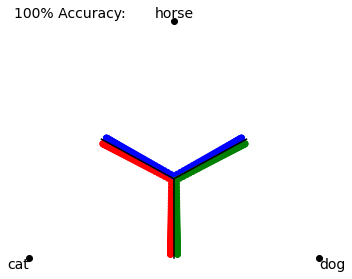

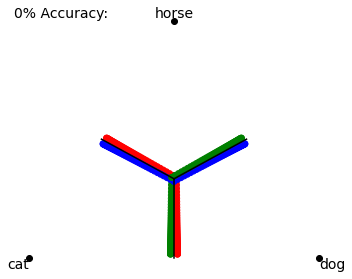

In [8]:
# generate and save images that we'll load in the next cell 
import matplotlib.pyplot as plt

# generate data along boundaries
def gen_bound(x, y, z, n=20, ind0=1): # ind0=1 skips the "first point"
    return np.linspace(np.array([x[0],y[0],z[0]]), np.array([x[1],y[1],z[1]]), num=n+ind0)[ind0:]
  
def gen_bound_data(n_per=20, ind0=0):
    bdata = np.zeros((n_per*3,3))
    bdata[:n_per] = gen_bound(x=[0.333,0.5], y=[0.333,0.5], z=[0.333,0], n=n_per, ind0=ind0) 
    bdata[n_per:2*n_per] = gen_bound(x=[0.333,0], y=[0.333,0.5], z=[0.333,0.5], n=n_per, ind0=ind0)
    bdata[-n_per:] = gen_bound(x=[0.333,0.5], y=[0.333,0], z=[0.333,0.5], n=n_per, ind0=ind0)
    return bdata

def gen_near_bound_data(n_per=50, scale=7, eps=0.01):
    bdata = gen_bound_data(n_per=n_per)
    lower, right, left = bdata[0:n_per,:], bdata[n_per:2*n_per,:], bdata[-n_per:,:]

    # shift data a bit
    lower_catty = softmax( scale*(lower+np.array([eps,0,0])) )
    lower_doggy = softmax( scale*(lower+np.array([0.0,eps,0])) )

    left_catty = softmax( scale*(left+np.array([eps,0,0])) )
    left_horsey = softmax( scale*(left+np.array([0,0,eps])) )

    right_horsey = softmax( scale*(right+np.array([0,0,eps])) )
    right_doggy = softmax( scale*(right+np.array([0,eps,0])) )

    return np.vstack((lower_catty, lower_doggy, left_catty, left_horsey, right_horsey, right_doggy))

# move boundary a bit toward the "correct" side
eps = 0.007
acc_data = gen_near_bound_data(eps=eps)
btarg = np.argmax(acc_data, axis=-1)
TrianglePlot2D_MPL(acc_data, targ=btarg, show_bounds=True, labels=labels, comment='100% Accuracy:').do_plot()
plt.savefig("images/acc_100.png")

# move boundary a bit toward the "wrong" side (keeping labels the same as before)
inacc_data = gen_near_bound_data(eps=-eps)
ibtarg = btarg.copy()
TrianglePlot2D_MPL(inacc_data, targ=ibtarg, show_bounds=True, labels=labels, comment='0% Accuracy:').do_plot()
plt.savefig("images/acc_0.png")


## Loss vs. Accuracy

*Loss*: distance from target (continuous)<br>
*Accuracy*: % of points on the correct side of decision boundary (discontinuous)<br>
<br>
**Nearly identical losses:**<br>
<img style="display:inline-block" src="images/acc_100.png" width="40%">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img style="display:inline-block" src="images/acc_0.png" width="40%">

### 4 Classes in 3D: form a pyramid!

In [9]:
np.random.seed(1)
prob4, targ4 = calc_prob(n=500, s=2.7, dim=4)       # 4d probabilities
prob4, targ4 = np.vstack((np.eye(4),prob4)), np.hstack((np.arange(4),targ4)) # tack on poles b4 pca
prob3 = pca_proj(prob4)                     # use PCA for coordinate transformation to 3D hyperplane

In [10]:
plot = TrianglePlot3D_Plotly(prob3, targ=targ4, labels=labels+['bird'], show_labels=True, show_axes=False, poles_included=True)
plot.fig.update_layout(scene_camera=dict( eye=dict(x=1.5, y=1, z=0.7)))
plot.do_plot()

## Metric-Based Embedding Methods, OTOH...

...map similar points near each other, dissimilar points far away. => Clusters:

In [11]:
import plotly.graph_objects as go
def noop(x): return x 

def plot_clusters(dim=3, nclasses=4, nper=100, func=noop):
    np.random.seed(6)
    clusters = np.zeros((nclasses*nper,dim))
    colors = ['red','green','blue','orange']+['black']*max(nclasses-4,0)
    labels = ['cat','dog','horse','bird']+['aux']*max(nclasses-4,0)
    fig = go.Figure()
    for i in range(nclasses):
        mean, cov = 0.8*np.random.rand(dim), 0.002*np.eye(dim)
        cluster = func(np.random.multivariate_normal(mean, cov, nper))
        clusters[i*nper:(i+1)*nper] = cluster
        fig.add_trace( go.Scatter3d(x=cluster[:,0], y=cluster[:,1], z=cluster[:,2], hovertext=labels[i], name=labels[i], \
            mode='markers', marker=dict(size=5, opacity=0.6, color=colors[i])))
    fig.update_layout(margin_t=0, scene_camera=dict( eye=dict(x=0.7, y=0.7, z=0.7)))
    fig.show(config = {'displayModeBar': False})
    return clusters

In [13]:
clusters = plot_clusters() 

## Contrastive Loss
Like attracts like; "Opposites" repel:
    <img style="display:inline-block; vertical-align: text-top;" src="images/CL_springs_transp.png" width="50%"><br>
Tends to group things in "semantically meaningful" ways.

This picture of springs is the essence of a "[contrastive loss](https://arxiv.org/abs/2004.11362)" function. Unlike traditional ML classification where the loss is based on the "distance" to a "target" (or "ground truth") value, with these metric based methods we send in two (or even 3) data points together, and then either let them attract or repel each other, and we do this over and over and over until we reach some stopping criterion.  Eventually, what we'll have is a space that contains clusters of similar points, separated by a "margin" distance that we specify.

## Siamese Networks

*Identical twin* network branches map to points ("feature vectors") in N-dim space:

<center>
<img src="https://people.kth.se/~rosun/deep-learning/figures/siamese-arch.svg" width="65%">
    <p style="font-size:70%; text-align: center;">Example of a Siamese Network (source: <a href="https://people.kth.se/~rosun/deep-learning">Sundin et al</a>)</p>
</center>


## How well do they work?

Traditional vs. zero(/few)-shot methods: which one wins? *It depends.*

From high-scoring Kaggle competition entry using "[entity embeddings](https://arxiv.org/abs/1604.06737)":

> "Entity embedding not only **reduces memory usage** and **speeds up neural networks** compared with one-hot encoding, but more importantly by mapping similar values close to each other in the embedding space it **reveals the intrinsic properties of the categorical variables**."

Let's look at "PETS," via [my mod](https://colab.research.google.com/drive/1rSTOsj4coDu9mZCw57S7R6jBipm462R2?usp=sharing) of [FastAI's tutorial]() on Siamese Networks... 

## Zero-Shot & Few-Shot
**Cool thing:** Embedding function tends to work for classes **never seen before** 
<img src="images/my_pets_preds.png" width="80%">

<img src="images/my_pets_preds2.png" width="80%">

<img src="images/my_pets_preds3.png" width="80%">

So, for example, the embedding learned for grouping images of cats, dogs, and horses together would map images of birds to nearby points in the space.  Then "all we have to do" if we want to predict a class is see whether a new instance is "nearby" (according to some distance measure we decide) to other similar points.  We could even look at the "center points" of various clusters and regard these as the "class prototype" and use that in the future.

This fits (somewhat) with the notions of "prototypes" in human classification advanced by Eleanor Rosch in her revolutionary psychology work in the early 1970s.  We can say more about this later. ;-) 

This same method of contrastive losses and metrics is used not for classification *per se* but for things like photographic identity verification (an example that is given in Andrew Ng's Machine Learning course on Coursera): Say you want to have a facial recognition system (highly problematic for ethical reasons but it's a good  example of the method so bear with me) for a company where there can be turnover in employees: You probably don't want to train a traditional classifier with separate a class for each employee because then you'd have to re-train it every time someone joins or leaves the company.  Instead, you can store an image of each employee, and then when they appear in front of a camera for identity verification, you could compare the "distance" between the embedded data point for the new photo from the data point for the stored photo(s).  If the distance is small enough, then you can have confidence it's the same person.

 

What's nice about this is that, after you've trained your embedding system, it can typically still be used to measure similarity between pairs of things it's never seen before, because in the process of training it was forced to learn "semantically meaningful" ways of grouping points together.  This use of the linguistic work "semantic" is not accidental: the language model systems that rely on "word embeddings" can learn to group similar words together, and even have mathematical-like relationships in analogies (e.g., gender: "king - man + woman = queen", or countries-and-capitals: "Russia - Moscow + France = Paris") by treating the embedded data points as *vectors* that point from the origin of the coordinate system to the data point.  We can say more about this and the distance metric they use ("cosine similarity") another time.


So in using metric-based learning for classification, we're essentially adopting this identity-verification app and applying it to entire classes instead of individuals.

## Final thoughts
* 3D for teaching: robust yet viz-able, can help re. loss & accuracy
* Embeddings are just mappings to points in space
* Contrastive losses help give semantically meaningful embeddings
* Note that real-world embeddings often require >> 3D (e.g. 128D)
* `mrspuff` lib TODO: 
    * Live tracking of data points during training
    * Real images for points 
        * Add URLs to FastAI image data type / bunch / loader

## Acknowledgements
Thanks to [Zach Mueller](https://twitter.com/TheZachMueller), [Tanishq Abraham](https://twitter.com/iScienceLuvr) and [Isaac Flath](https://twitter.com/isaac_flath) for help with fastai! 

## References:
<ul style="font-size:90%">
<li> <a href="https://github.com/adambielski/siamese-triplet">"Siamese and triplet learning with online pair/triplet mining"</a> by Adam Bielski
<li> <a href="https://twitter.com/jeremyphoward/status/1133252425949753344/photo/1">Example of new `Pipeline` class to create data for a Siamese model,"</a> by Jeremy Howard
<li> <a href="https://towardsdatascience.com/siamese-network-triplet-loss-b4ca82c1aec8">"Siamese Network &amp; Triplet Loss"</a> by Rohith Gandhi
<li> <a href="https://github.com/KevinMusgrave/pytorch-metric-learning">pytorch-metric-learning</a> by Kevin Musgrave
<li> <a href="https://towardsdatascience.com/contrastive-loss-explaned-159f2d4a87ec">"Contrastive Loss Explained"</a> by Brian Williams
<li> <a href="https://arxiv.org/abs/2006.07733">"Bootstrap Your Own Latent (BYOL)"</a> by Grill et al
<li> <b><a href="https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf">"Siamese Neural Networks for One-shot Image Recognition"</a> by Koch et al</b>
<li> <a href="https://msiam.github.io/Few-Shot-Learning/">"Few Shot Learning"</a> by msiam
<li> <a href="https://katefvision.github.io/katefSlides/oneshotlearning_katef.pdf">"Learning to learn, Low shot learning"</a> by Katerina Fragkiadaki
<li> <a href="http://proceedings.mlr.press/v37/romera-paredes15.pdf">"Embarassingly Simple": </a> <span style="color:blue">"We describe azero-shot learning approach that can be implemented in just one line of code, yet it is able to
    outperform state of the art approaches on standard datasets"</span>
</ul>


## Slideshow Instructions, Revisited:
1. When the circle next to the "Python 3" in the upper right changes from being a solid circle to an open circle, that means `Kernel > Restart & Run All` has finished. After that...
2. Remember to put your browser in Full Screen mode.
2. Start the show by pressing `Alt-R`* and then `Home`*. Space bar to advance the slide, and `?` for help. 

    \* or the bar-graph icon in the toolbar. On a Mac, `Home` is `Command-LeftArrow`